## Classifying Yelp Reviews using various NLP techniques in Data Science


Vectorizing for machine learning:
Count Vectorization
Term Frequency–Inverse Document Frequency Vectorization

Text Classification with Logistic Regression

N-Grams

Stop-Word Removal

Using CountVectorizer in a Model

Using Grid Search for Logistic Regression

TextBlob, Stemming and Lemmatization, Count Vector Options etc

Sentiment Analysis using Naive Bayes Classifier In TextBlob For NLP


#### Data

This dataset is a subset of Yelp's businesses, reviews, and user data that is available at https://www.yelp.com/dataset

The original JSON files can be found in yelp_academic_dataset.zip. 

To create yelp_academic_dataset.csv I used
$ python json_to_csv_converter.py yelp_academic_dataset.json 

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.stem.snowball import SnowballStemmer


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read yelp.csv into a DataFrame.

yelp = pd.read_csv('C:/Users/uknow/Desktop/yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
yelp.shape


(10000, 10)

In [14]:
yelp.columns


Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

Text classification is the task of predicting which category or topic a text sample is from.

Here the goal is to identify: Does a review has positive or negative sentiment?

This is a classification problem. We will train a ML model to classify reviews that have 5 or 1 stars.

In [6]:
# Extract the data that contains only the 5-stars and 1-stars (highest and lowest reviews)

yelp_5_1 = yelp[(yelp.stars==5) | (yelp.stars==1)]
yelp_5_1.shape

(4086, 10)

In [7]:
# Define X and y using 'text' (reviews) as features and 'stars' (labels) as the target output
X = yelp_5_1.text
y = yelp_5_1.stars

## Text classification

is done in the same way as all other classification models. Steps: 

**1. Split** the data into training and testing


In [9]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2043,) (2043,)
(2043,) (2043,)


To use a machine learning model, we must convert unstructured text into numeric features.

**2. Encode** (vectorize) text into a set of numeric features

In [20]:
#Initialize the vectorizer
vect = CountVectorizer(lowercase=False)

# calling the fit_transform method on X_train and transform on X_test  
X_train_s = vect.fit_transform(X_train) 
X_test_s = vect.transform(X_test) 

In [21]:
#X_train_s and X_test_s are sparse matrices: rows are documents, columns are terms ("tokens", individual words in this case).
    
print(type(X_train_s)) 

<class 'scipy.sparse.csr.csr_matrix'>


In [22]:
#We have 2043 Yelp reviews in our training set
#13684 unique words were found across all documents.
X_train_s.shape

(2043, 16722)

In [23]:
X_test_s.shape

(2043, 16722)

In [24]:
X_train_s

<2043x16722 sparse matrix of type '<class 'numpy.int64'>'
	with 164990 stored elements in Compressed Sparse Row format>

**Count Vectorizer** simply counts the number of times a "word" appears in a document

In [25]:
# Return a list of every word in the corpus, with its index position in the bag-of-words
#contains 16,825 unique words.
vect.vocabulary_

{'Heard': 2356,
 'about': 5396,
 'this': 15557,
 'restaurant': 13660,
 'from': 9485,
 'friend': 9466,
 'and': 5726,
 'was': 16352,
 'amaze': 5686,
 'by': 6760,
 'the': 15512,
 'food': 9350,
 'their': 15518,
 'friendly': 9470,
 'service': 14165,
 'tried': 15825,
 'chicken': 7086,
 'adobo': 5519,
 'it': 10717,
 'amazing': 5689,
 'The': 4811,
 'came': 6802,
 'apart': 5777,
 'with': 16541,
 'no': 11979,
 'effort': 8641,
 'had': 9950,
 'great': 9825,
 'honey': 10243,
 'glazed': 9685,
 'taste': 15379,
 'portions': 12858,
 'were': 16430,
 'good': 9734,
 'amount': 5710,
 'for': 9370,
 'low': 11282,
 'prices': 13002,
 'couldn': 7667,
 'get': 9639,
 'enough': 8766,
 'of': 12099,
 'dessert': 8163,
 'Some': 4470,
 'my': 11854,
 'friends': 9471,
 'brought': 6623,
 'me': 11503,
 'here': 10140,
 'last': 10974,
 'night': 11962,
 'first': 9226,
 'thing': 15545,
 'that': 15507,
 'into': 10651,
 'mind': 11648,
 'set': 14172,
 'up': 16066,
 'To': 4858,
 'Catch': 1088,
 'Predator': 3851,
 'ready': 13358,
 

In [28]:
# Last 10 features
print((vect.get_feature_names()[-10:]))

['ziploc', 'zipper', 'zone', 'zoning', 'zoo', 'zucchini', 'zuchinni', 'zupa', 'zwiebel', 'ém']


In [27]:
# Show vectorizer options.
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

**3. Apply a standard machine learning classifier**

Use Logistic Regression to predict the star rating


In [141]:
logreg = LogisticRegression()
logreg.fit(X_train_s, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [142]:
#Predictions
y_pred = logreg.predict(X_test_s)

#Accuracy
logreg.score(X_test_s, y_pred)

1.0

In [139]:
# Classification accuracy on the test dataset

print('Test Accuracy: %.3f' % logreg.score(X_test, y_test))

Test Accuracy: 0.864


In [40]:
y_test.value_counts()

5    1688
1     355
Name: stars, dtype: int64

### Other Useful Parameters of CountVectorizer():

Include **1-grams and 2-grams** (both single and two independent features) 
 - ngram_range = (min_n, max_n)

In [46]:
vect = CountVectorizer(ngram_range=(1, 2))
X_train_s = vect.fit_transform(X_train)
X_train_s.shape

(2043, 125457)

In [49]:
# Last 10 features
print((vect.get_feature_names()[-10:]))

['zupas cater', 'zuzu', 'zuzu in', 'zuzu is', 'zuzu the', 'zuzu was', 'zwiebel', 'zwiebel kräuter', 'ém', 'ém all']


Remove **stop words** and limit **max_features=1000**

In [59]:
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english', max_features=100000)
X_train_s = vect.fit_transform(X_train)
X_train_s.shape

(2043, 100000)

The preprocessor option **preprocessor=stemmer** for stemming ie to reduce  words to their base/stem/root form:

In [64]:
def stemmer(text):
    stemmer = SnowballStemmer('english')
    return [stemmer.stem(word) for word in text.split()]

vect.set_params(preprocessor=SnowballStemmer('english'))


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100000, min_df=1,
        ngram_range=(1, 2),
        preprocessor=<nltk.stem.snowball.SnowballStemmer object at 0x00000296A73EAD68>,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [184]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

[w for w in stemmer('a day likes this pass, tomorrow is another day')[-10:] if w not in stop]

['day', 'like', 'pass,', 'tomorrow', 'anoth', 'day']

In [65]:
# Check the preprocessor option
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100000, min_df=1,
        ngram_range=(1, 2),
        preprocessor=<nltk.stem.snowball.SnowballStemmer object at 0x00000296A73EAD68>,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [108]:
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english', max_features=100000)
X_train_s = vect.fit_transform(X_train)
X_test_s = vect.transform(X_test) 

In [109]:
# Last 10 features
print((vect.get_feature_names()[-10:]))

['zupas', 'zupas cater', 'zuzu', 'zuzu downtown', 'zuzu far', 'zuzu good', 'zuzu ultimate', 'zwiebel', 'zwiebel kräuter', 'ém']


**CountVectorizer** returns the word (term) frequencies:

In [110]:
tf = pd.DataFrame(vect.fit_transform(X_train).toarray(), columns=vect.get_feature_names())
tf[tf.columns[-10:]][-5:]

,zupas,zupas cater,zuzu,zuzu downtown,zuzu far,zuzu good,zuzu ultimate,zwiebel,zwiebel kräuter,ém
2038,0,0,0,0,0,0,0,0,0,0
2039,0,0,0,0,0,0,0,0,0,0
2040,0,0,0,0,0,0,0,0,0,0
2041,0,0,0,0,0,0,0,0,0,0
2042,0,0,0,0,0,0,0,0,0,0


In [111]:
logreg = LogisticRegression()
logreg.fit(X_train_s, y_train)

#Predictions
y_pred = logreg.predict(X_test_s)
logreg.score(X_test_s, y_pred)


1.0

Assessing word relevancy via term frequency-inverse document frequency

**TF-IDF Vectorizer** is another vectorizer that not only counts the unique words in a text (tf - "term frequency") but it analyzes the uniqueness of words between documents to find distinguishing characteristics (the "relative frequency")

In [125]:
# TfidfVectorizer
vect2 = TfidfVectorizer(stop_words='english', preprocessor=None)
tfidf = pd.DataFrame(vect2.fit_transform(X_train).toarray(), columns=vect.get_feature_names())

In [126]:
X_train_s2 = vect2.fit_transform(X_train)
X_train_s2.shape

(2043, 13393)

In [127]:
tfidf[tf_idf.columns[-10:]][-5:]

,zoyo,zucca,zucchini,zuchinni,zumba,zupa,zupas,zuzu,zwiebel,ém
2038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
pipe = Pipeline([('vect', vect2), ('lg', LogisticRegression(random_state=1))])


In [194]:
pipe.fit(X_train, y_train)
y_pred = pipe_lg.predict(X_test)

In [195]:
# Classification accuracy on the test dataset

print('Test Accuracy: %.3f' % pipe.score(X_test, y_test))

Test Accuracy: 0.864



### Grid Search

Initialize Grid Search object and its param_grid using 2 parameter dictionaries: 

For vectorizer:
 - In the first dic I used TfidfVectorizer for encoding text
 - In the second dic I set those parameters to None so I can train a model based on raw term frequencies

For the logistic regression. I train models using L2 and L1 and different regularization strengths 1/C

In [188]:
param_grid = [{'vect__ngram_range': [(1,1)], 'vect__stop_words': [stop, None], 'vect__tokenizer': [stemmer, stemmer], 'lg__penalty': ['l1', 'l2'], 'lg__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1,1)],'vect__stop_words': [stop, None], 'vect__tokenizer': [stemmer, stemmer],'vect__use_idf':[False],'vect__norm':[None],'lg__penalty': ['l1', 'l2'],'lg__C': [1.0, 10.0, 100.0]}
             ]

gs = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5, verbose=1,n_jobs=-1)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  7.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...e, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'vect__ngram_range': [(1, 1)], 'vect__stop_words': [['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's..._use_idf': [False], 'vect__norm': [None], 'lg__penalty': ['l1', 'l2'], 'lg__C': [1.0, 10.0, 100.0]}],
       pre_dispatch='2*n_jobs', refit=T

In [190]:
gs.best_params_

{'lg__C': 100.0,
 'lg__penalty': 'l2',
 'vect__ngram_range': (1, 1),
 'vect__stop_words': None,
 'vect__tokenizer': <function __main__.stemmer(text)>}

In [192]:
#5-fold cross-validation accuracy scores on the training set 

# CV accuracy
gs.best_score_

0.9187469407733725

In [197]:
gs.best_estimator_

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...e, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [228]:
pipe.get_params()

{'memory': None,
 'steps': [('vect',
   TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
           dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
           lowercase=True, max_df=1.0, max_features=None, min_df=1,
           ngram_range=[(1, 1)], norm='l2', preprocessor=None,
           smooth_idf=True, stop_words='english', strip_accents=None,
           sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
           tokenizer=None, use_idf=True, vocabulary=None)),
  ('lg',
   LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=100, multi_class='warn',
             n_jobs=None, penalty='l2', random_state=1, solver='warn',
             tol=0.0001, verbose=0, warm_start=False))],
 'vect': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_feat

In [229]:
best_params={'vect__ngram_range': [(1, 1)], 'lg__penalty': 'l2', 'lg__C': 100.0 }
pipe.set_params(**best_params)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=[(1, 1)], norm='l2', preprocessor=None,
        smooth_...e, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

Let's run another **Grid Search**  using parameter vect__ngram_range': (1, 2} for the second dictionary

In [203]:
param_grid = [{'vect__ngram_range': [(1,1)], 'vect__stop_words': [stop, None], 'vect__tokenizer': [stemmer, stemmer], 'lg__penalty': ['l2'], 'lg__C': [1.0, 10.0, 100.0]},
             {'vect__ngram_range': [(1,2)], 'vect__stop_words': [stop, None], 'vect__tokenizer': [stemmer, stemmer], 'lg__penalty': ['l2'], 'lg__C': [1.0, 10.0, 100.0]}]

gs2 = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5, verbose=1,n_jobs=-1)

gs2.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...e, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'vect__ngram_range': [(1, 1)], 'vect__stop_words': [['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's...58>, <function stemmer at 0x00000296A911E158>], 'lg__penalty': ['l2'], 'lg__C': [1.0, 10.0, 100.0]}],
       pre_dispatch='2*n_jobs', refit=T

In [202]:
gs2.best_params_

{'lg__C': 100.0,
 'lg__penalty': 'l2',
 'vect__ngram_range': (1, 1),
 'vect__stop_words': None,
 'vect__tokenizer': <function __main__.stemmer(text)>}

In [204]:
#5-fold cross-validation accuracy scores on the training set 

# CV accuracy
gs2.best_score_

0.9187469407733725

In [235]:
best_model=gs2.best_estimator_

Using the best model from this grid search that has the best_params option for the vectorizer and logistic regression

In [231]:
#The 5-fold cross-validation accuracy scores on the training dataset

print('5-fold CV Accuracy: %.3f' % gs2.best_score_)

5-fold CV Accuracy: 0.919


In [237]:
# Classification accuracy on the test dataset

print('Classification Accuracy: %.3f' % best_model.score(X_test, y_test))

Classification Accuracy: 0.929


### The performance of our classifier

We built a ML model that can predict whether a yelp review is positive (5-stars) or negative (1 star) with 93% accuracy

## Sentiment analysis of yelp reviews

In [244]:
# The 4rd review:

print((yelp_5_1.text[3]))

Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballparks, and a lake with ducks.

The Scottsdale Park and Rec Dept. does a wonderful job of keeping the park clean and shaded.  You can find trash cans and poopy-pick up mitts located all over the park and paths.

The fenced in area is huge to let the dogs run, play, and sniff!


In [252]:
#I use TextBlob, a useful library for processing text data

from textblob import TextBlob

review = TextBlob(yelp_5_1.text[3])

In [257]:
review.words

WordList(['Rosie', 'Dakota', 'and', 'I', 'LOVE', 'Chaparral', 'Dog', 'Park', 'It', "'s", 'very', 'convenient', 'and', 'surrounded', 'by', 'a', 'lot', 'of', 'paths', 'a', 'desert', 'xeriscape', 'baseball', 'fields', 'ballparks', 'and', 'a', 'lake', 'with', 'ducks', 'The', 'Scottsdale', 'Park', 'and', 'Rec', 'Dept', 'does', 'a', 'wonderful', 'job', 'of', 'keeping', 'the', 'park', 'clean', 'and', 'shaded', 'You', 'can', 'find', 'trash', 'cans', 'and', 'poopy-pick', 'up', 'mitts', 'located', 'all', 'over', 'the', 'park', 'and', 'paths', 'The', 'fenced', 'in', 'area', 'is', 'huge', 'to', 'let', 'the', 'dogs', 'run', 'play', 'and', 'sniff'])

#### Words Inflection and Lemmatization

In [274]:
# noun (to singular) and verbs(to present tense)
print([word.lemmatize('v') for word in review.words])

['Rosie', 'Dakota', 'and', 'I', 'LOVE', 'Chaparral', 'Dog', 'Park', 'It', "'s", 'very', 'convenient', 'and', 'surround', 'by', 'a', 'lot', 'of', 'paths', 'a', 'desert', 'xeriscape', 'baseball', 'field', 'ballparks', 'and', 'a', 'lake', 'with', 'duck', 'The', 'Scottsdale', 'Park', 'and', 'Rec', 'Dept', 'do', 'a', 'wonderful', 'job', 'of', 'keep', 'the', 'park', 'clean', 'and', 'shade', 'You', 'can', 'find', 'trash', 'can', 'and', 'poopy-pick', 'up', 'mitts', 'locate', 'all', 'over', 'the', 'park', 'and', 'paths', 'The', 'fence', 'in', 'area', 'be', 'huge', 'to', 'let', 'the', 'dog', 'run', 'play', 'and', 'sniff']


In [283]:
review.lower()

TextBlob("rosie, dakota, and i love chaparral dog park!!! it's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballparks, and a lake with ducks.

the scottsdale park and rec dept. does a wonderful job of keeping the park clean and shaded.  you can find trash cans and poopy-pick up mitts located all over the park and paths.

the fenced in area is huge to let the dogs run, play, and sniff!")

In [286]:
review.find("and")

15

#### Get Word and Noun Phrase Frequencies

In [314]:
review.words.count("ducks", case_sensitive=False)

1

In [307]:
review.noun_phrases

WordList(['rosie', 'dakota', 'love chaparral dog', 'desert xeriscape', 'baseball fields', 'scottsdale', 'rec dept', 'wonderful job', 'trash cans'])

In [299]:
review.noun_phrases.count('wonderful job')

1

In [315]:
#returns a list of tuples of n=2 successive words.
review.ngrams(2)[-5:]

[WordList(['the', 'dogs']),
 WordList(['dogs', 'run']),
 WordList(['run', 'play']),
 WordList(['play', 'and']),
 WordList(['and', 'sniff'])]

In [266]:
review.sentences

[Sentence("Rosie, Dakota, and I LOVE Chaparral Dog Park!!!"),
 Sentence("It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballparks, and a lake with ducks."),
 Sentence("The Scottsdale Park and Rec Dept."),
 Sentence("does a wonderful job of keeping the park clean and shaded."),
 Sentence("You can find trash cans and poopy-pick up mitts located all over the park and paths."),
 Sentence("The fenced in area is huge to let the dogs run, play, and sniff!")]

In [ ]:
for sentence in sentences:
    print(sentence)

For each sentence in the review:

#### Polarity and Subjectivity:

- Polarity score between [-1, 1]

- Subjectivity is within the range [0,1] where 0 very objective, 1 very subjective

In [325]:
for sentence in review.sentences:
    print(sentence)
    print(sentence.sentiment)
    print("---")

Rosie, Dakota, and I LOVE Chaparral Dog Park!!!
Sentiment(polarity=0.9765625, subjectivity=0.6)
---
It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballparks, and a lake with ducks.
Sentiment(polarity=0.2, subjectivity=0.3)
---
The Scottsdale Park and Rec Dept.
Sentiment(polarity=0.0, subjectivity=0.0)
---
does a wonderful job of keeping the park clean and shaded.
Sentiment(polarity=0.6833333333333333, subjectivity=0.8500000000000001)
---
You can find trash cans and poopy-pick up mitts located all over the park and paths.
Sentiment(polarity=0.0, subjectivity=0.0)
---
The fenced in area is huge to let the dogs run, play, and sniff!
Sentiment(polarity=0.5000000000000001, subjectivity=0.9)
---


#### Add a new column to yelp dataset "sentiment" for polarity score

In [332]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
    #return TextBlob(text).sentiment.polarity

yelp['sentiment'] = yelp.text.apply(polarity)

#### Create a box plot of sentiment grouped by stars

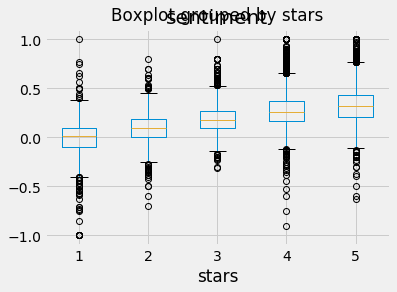

In [343]:
yelp.boxplot(column='sentiment', by='stars')

#### Get the reviews with most positive sentiment (1)

In [344]:

yelp[yelp.sentiment == 1].text.head()

254    Our server Gary was awesome. Food was amazing....
347    3 syllables for this place. \nA-MAZ-ING!\n\nTh...
420                                    LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as C...
679                                     Excellent burger
Name: text, dtype: object

#### Get the reviews with most negative sentiment (-1)

In [346]:
yelp[yelp.sentiment == -1].text.head()

773     This was absolutely horrible. I got the suprem...
1517                  Nasty workers and over priced trash
3266    Absolutely awful... these guys have NO idea wh...
4766                                       Very bad food!
5812        I wouldn't send my worst enemy to this place.
Name: text, dtype: object

#### Get positive sentiment in a 1-star review

In [356]:
yelp[(yelp.stars == 1) & (yelp.sentiment > 0.75)]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,sentiment
1781,53YGfwmbW73JhFiemNeyzQ,2012-06-22,Gi-4O3EhE175vujbFGDIew,1,If you like the stuck up Scottsdale vibe this ...,review,Hqgx3IdJAAaoQjvrUnbNvw,0,1,2,0.766667
8833,iHmfkYeEsIxbAqEj3dloQQ,2012-07-03,N_hL1-fyunhVpDDX6fz9Sg,1,The owner has changed hands & this place isn't...,review,HY9A-ShZQ1MvdFvEhNY4LQ,0,1,0,1.000000


#### Get negative sentiment in a 5-star review

In [352]:
yelp[(yelp.stars == 5) & (yelp.sentiment < -0.5)]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,sentiment
1287,57-dgZzOnLox6eudArRKgw,2008-08-28,sksXE8krD3WvqSOhtlSUyQ,5,"Obsessed. Like, I've-got-the-Twangy-Tart-withd...",review,gEnU4BqTK-4abqYl_Ljjfg,3,3,5,-0.625
6726,FURgKkRFtMK5yKbjYZVVwA,2012-08-13,8xx8i94sKvBhWZv8ZVyfBA,5,"Brown bag chicken sammich, mac n cheese, fried...",review,hFP7Si9jvdOUmmMesg4ghw,0,0,0,-0.600


### Let's build a text classifier using features: text, sentiment, cool, useful, funny 

We will train a logistic regression model to classify yelp reviews into best/worst stars

In [363]:
features = ['text', 'sentiment', 'cool', 'useful', 'funny']


yelp_5_1 = yelp[(yelp.stars==5) | (yelp.stars==1)]
X = yelp_5_1[features]
y = yelp_5_1.stars

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [372]:
# Use CountVectorizer with text column only

vect = CountVectorizer()
X_train_sparse = vect.fit_transform(X_train.text)
X_test_sparse = vect.transform(X_test.text)

In [373]:
# Use logistic regression with text column only.
logreg = LogisticRegression(C=1000)
logreg.fit(X_train_sparse, y_train)
y_pred_class = logreg.predict(X_test_sparse)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9197651663405088


In [378]:
# set up the parameters of the model you'd like to fit
param_grid = {
    'penalty': ['l1', 'l2'],
    'C'      : [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000],
}

# load it into the grid
grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=10)


grid.fit(X_train_sparse, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [379]:
grid.best_params_

{'C': 10, 'penalty': 'l2'}

In [386]:
# Cross-Validation score for testing data
grid.best_score_

0.9343994778067886

In [391]:
model = grid.best_estimator_

In [394]:
y_pred_class = model.predict(X_test_sparse)
y_pred_class

array([5, 5, 5, ..., 5, 1, 5], dtype=int64)

In [392]:
# Classification accuracy on the test dataset

print('Classification Accuracy: %.3f' % model.score(X_test_sparse, y_test))

Classification Accuracy: 0.925


## Naive Bayes Classifier with Text 

We used Logistic Regression Classifier for text classification.

Naive Bayes is another popular classifier. Naive Bayes has minimal storage requirements, is fast and can be tuned easily with more data

In [404]:
from textblob.classifiers import NaiveBayesClassifier


In [420]:
features = ["text", "stars"]

df = yelp_5_1[features]
df.tail()

,text,stars
9990,Yes I do rock the hipster joints. I dig this ...,5
9991,Only 4 stars? \n\n(A few notes: The folks that...,5
9992,I'm not normally one to jump at reviewing a ch...,5
9994,Let's see...what is there NOT to like about Su...,5
9999,4-5 locations.. all 4.5 star average.. I think...,5


In [422]:
#Print first 100 characters from the review at index 9991:

df.loc[9991, 'text'][:100]

'Only 4 stars? \n\n(A few notes: The folks that rated this place low must have been isolated incidences'

In [436]:
import re
def cleaning(text):
    text = re.sub('[\n]+', ' ', text) # remove \n 
    return text

cleaning(df.loc[9999, 'text'][:100])

'4-5 locations.. all 4.5 star average.. I think Arizona really has some fantastic Pizza options, and '

In [437]:
df["text"]= df["text"].apply(cleaning)
df.tail()

,text,stars
9990,Yes I do rock the hipster joints. I dig this ...,5
9991,Only 4 stars? (A few notes: The folks that ra...,5
9992,I'm not normally one to jump at reviewing a ch...,5
9994,Let's see...what is there NOT to like about Su...,5
9999,4-5 locations.. all 4.5 star average.. I think...,5


In [441]:
df.values[1]

array(['I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that. In any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we\'ll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here\'s The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked th

###  (80-20 split) : Create training and test datasets using np.random()

In [451]:
np.random.seed(0)
msk = np.random.rand(len(df)) < 0.8

df_train = df[msk]
df_test = df[~msk]

### Format CSV files for using TextBlob classifiers:

In [453]:
#tuples

train = [tuple(x) for x in df_train.values]
test = [tuple(x) for x in df_test.values]

train[0:3]

[('My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better. Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing. While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had. Anyway, I can\'t wait to go back!',
  5),
 ('I have no idea why some people give bad reviews about this place. It goes to show you, you can 

In [454]:
nb = NaiveBayesClassifier(tuples_train)

Naive Bayes classifier is now ready to classify reviews in the test set as highest/lowest score using classify(text) method:

In [457]:
#The 3rd test review: 
test[3][0]

"Never having dealt with a Discount Tire in Phoenix before (only in Texas, and their service has been great all the time), I came in not knowing what kind of service to expect. I was pleasantly surprised! The store had a good amount of parking, and the store front was clean, open and had adequate seating around the perimeters. There were already 5-6 people sitting and waiting for their cars to be finished, and 2 people waiting infront of me to see a representative. All the guys working there were busy helping someone, yet were saying hello to us and reassuring they'd get to us very soon. I didn't wait an unneccesary amount of time and then was helped by Wally. He inspected my tires, recommended a plan of action gave me options, and we headed back into the store. After I made my decision to replace 2 of the tires, he checked their stock, and unfortunately they didn't have them there. BUT he called another store and had them picked up for the next morning, so I could just come back the n

In [458]:
nb.classify(test[3][0])

1

Get the label probability distribution with the prob_classify(text) method

In [461]:
predicted_classifications = []

def make_predictions():
    for i in range(len(test)):
        classification = nb.classify(test[i][0])
        predicted_classifications.append(classification)

make_predictions()

predicted_classifications[0:9]

[5, 5, 5, 1, 5, 5, 5, 5, 5]

In [489]:
def miss_error():
    countMissed = 0
    for i in range(len(tuples_test)):
        if predicted_classifications[i] != test[i][1]:
            countMissed += 1
    error = (countMissed / len(test))*100
    print('Misclassification error:', error)
    print('Accuracy:', 100-error)

miss_error()


Misclassification error: 13.053892215568863
Accuracy: 86.94610778443113


Classifier is correct 86.94610778443113 of the time

Finally, we may also want to manually take a look at some reviews classified incorrectly. 



In [491]:
# Returns the index of missclassified reviews

def missclassified():
    Indexes = []
    for i in range(len(tuples_test)):
        if predicted_classifications[i] != test[i][1]:
            Indexes.append(i)
            return Indexes
missclassified()

[3]

In [492]:
test[3]

("Never having dealt with a Discount Tire in Phoenix before (only in Texas, and their service has been great all the time), I came in not knowing what kind of service to expect. I was pleasantly surprised! The store had a good amount of parking, and the store front was clean, open and had adequate seating around the perimeters. There were already 5-6 people sitting and waiting for their cars to be finished, and 2 people waiting infront of me to see a representative. All the guys working there were busy helping someone, yet were saying hello to us and reassuring they'd get to us very soon. I didn't wait an unneccesary amount of time and then was helped by Wally. He inspected my tires, recommended a plan of action gave me options, and we headed back into the store. After I made my decision to replace 2 of the tires, he checked their stock, and unfortunately they didn't have them there. BUT he called another store and had them picked up for the next morning, so I could just come back the 